# Escola Politécnica da Universidade de São Paulo

## Autor: PMR3508-2018-1f648a80b1 - Lucas Penna Saraiva

### Atividade 3: Regressão

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model


In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')
treino = treino.drop(columns=["Id"])

# 1. Análise de Dados

In [3]:
treino.head(20)

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.85,37.57,27,819,157,451,150,34934,193800
1,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,-118.11,33.92,32,1016,190,729,177,43000,151300
3,-118.12,34.15,35,1760,447,984,384,34167,198200
4,-120.63,37.41,27,2083,444,1462,479,26439,69100
5,-121.43,38.54,42,3321,688,1346,658,24618,101300
6,-122.28,37.53,25,3710,1015,2068,958,35445,286700
7,-116.99,34.88,23,6060,1165,2920,1072,31528,69000
8,-117.28,34.17,26,3106,603,1396,576,31736,122200
9,-122.06,37.91,15,5393,1422,2133,1288,41612,232800


In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 9 columns):
longitude             14448 non-null float64
latitude              14448 non-null float64
median_age            14448 non-null int64
total_rooms           14448 non-null int64
total_bedrooms        14448 non-null int64
population            14448 non-null int64
households            14448 non-null int64
median_income         14448 non-null int64
median_house_value    14448 non-null int64
dtypes: float64(2), int64(7)
memory usage: 1016.0 KB


Não há missing data e portanto não é necessário arrumar a base de dados.

In [5]:
treino.describe()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450,207556.603267
std,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037,116441.436255
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000,119300.000000
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000,179950.000000
75%,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000,266100.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000,500001.000000


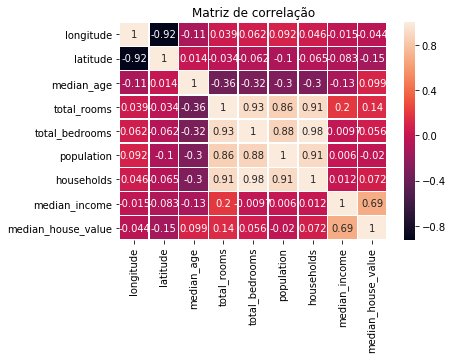

In [6]:
plt.title('Matriz de correlação')
sns.heatmap(treino.corr(), annot=True, linewidths=0.5)

Analisando a matriz de correlação, notamos que há correlação próxima de 1 principalmente as features "total_rooms, total_bedrooms e populations" em relação a households.

# 2. Testando os Regressores

## 2.1 Regressão Linear

In [7]:
treino_Y = treino['median_house_value']
treino = treino.drop(columns='median_house_value')
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
LR.fit(treino, treino_Y)
LR.score(treino, treino_Y)

0.6387819464940645

## 2.2 Rede Neural Artificial

Referências:
> **Neural Network methods: https://scikit-learn.org/stable/modules/neural_networks_supervised.html**

> **How to make a GridSearch in order to find out the best hyperparameters: https://www.kaggle.com/hhllcks/neural-net-with-gridsearch#8**

Vamos testar agora um Perceptron de Múltiplas Camadas.


In [8]:
#demora demais bixo, tá preparado?

'''
parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf_grid.fit(treino, treino_Y)
clf_grid.score(treino, treino_Y)
'''


"\nparameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}\nclf_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)\nclf_grid.fit(treino, treino_Y)\nclf_grid.score(treino, treino_Y)\n"

## 2.3 Lasso Regressor


In [20]:
clf = linear_model.Lasso(alpha=2500)
clf.fit(treino, treino_Y)
clf.score(treino, treino_Y)

0.6352223000884966